In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as ml
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output

import pandas_profiling
import mglearn # либа с книги введение в маш обучение

#print(check_output(["ls", "../input"]).decode("utf8"))

/home/l.poberezhnya/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/l.poberezhnya/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/l.poberezhnya/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/l.poberezhnya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/l.poberezhnya/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/l.poberezhnya/anaconda3/lib/python3.6/site-packages

In [4]:
df = pd.read_csv('data/data_cancer.csv')

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [14]:
pandas_profiling.ProfileReport(df)

Number of variables,33
Number of observations,569
Total Missing (%),3.0%
Total size in memory,146.8 KiB
Average record size in memory,264.1 B
Numeric,21
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,11


In [15]:
#To retrieve the list of variables which are rejected due to high correlation:
profile = pandas_profiling.ProfileReport(df)
rejected_variables = profile.get_rejected_variables(threshold=0.9)

In [18]:
rejected_variables

['area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst']

In [19]:
rejected_df = df[rejected_variables]

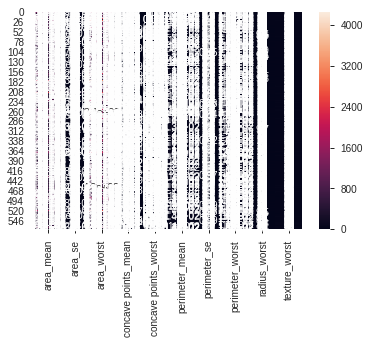

In [29]:
sns.heatmap(rejected_df, annot=True)

In [5]:
# Cleaning and modifying the data
df = df.drop(['id', 'Unnamed: 32'], axis = 1)
# Mapping Benign to 0 and Malignant to 1 
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

#Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(df.iloc[:, 1:32]), columns = list(df.iloc[:, 1:32].columns))
datas['diagnosis'] = df['diagnosis']

#Creating the high dimensional feature space X
data_drop = datas.drop('diagnosis', axis =1)
X = data_drop.values

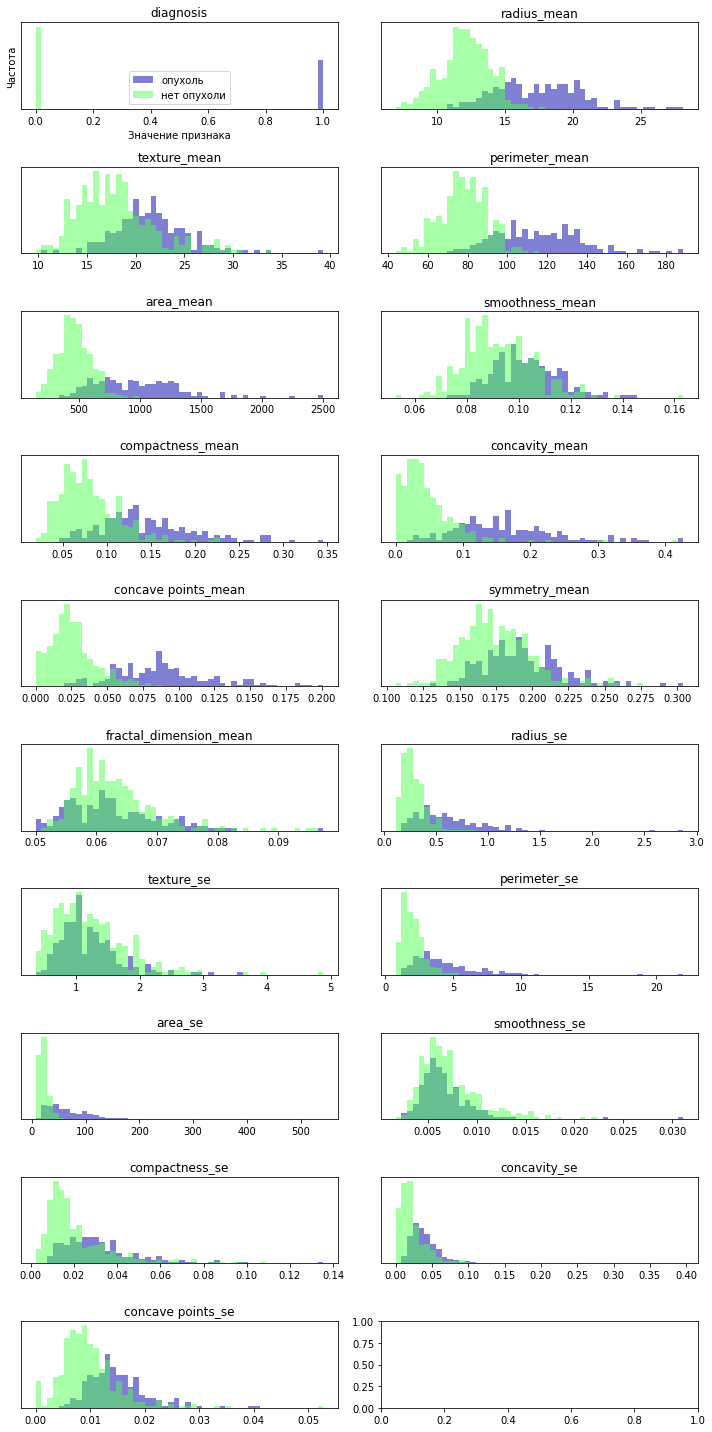

In [7]:
fig, axes = plt.subplots(10, 2, figsize=(10, 20))
churn =  df[df['diagnosis'] == 1]
no_churn = df[df['diagnosis'] == 0]
ax = axes.ravel()
for i in range(19):
    _, bins = np.histogram(df.iloc[:, i], bins=50)
    ax[i].hist(churn.iloc[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(no_churn.iloc[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(df.columns)[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Значение признака")
    ax[0].set_ylabel("Частота")
ax[0].legend(["опухоль", "нет опухоли"], loc="best")
fig.tight_layout()

In [106]:
#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter = 4000)
Y= tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.826653
[t-SNE] Error after 1850 iterations: 0.858903


test = pd.DataFrame(data = Y)
test['diagnosis'] = df['diagnosis']
test

Text(0.5,0,'Actual clusters')

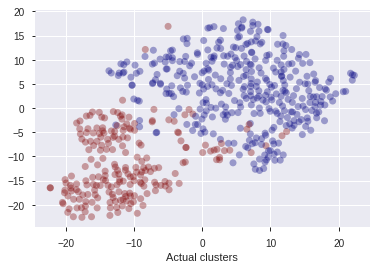

In [115]:
# plot the result
vis_x = Y[:, 0]
vis_y = Y[:, 1]

plt.scatter(vis_x, vis_y, c= datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
plt.xlabel('Actual clusters')

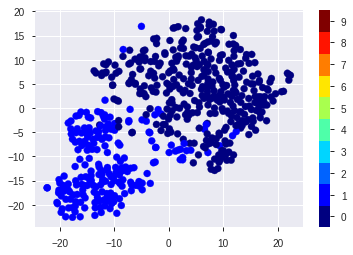

In [116]:
vis_x = Y[:, 0]
vis_y = Y[:, 1]
plt.scatter(vis_x, vis_y, c= datas['diagnosis'], cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()


Text(0.5,1,'Actual clusters')

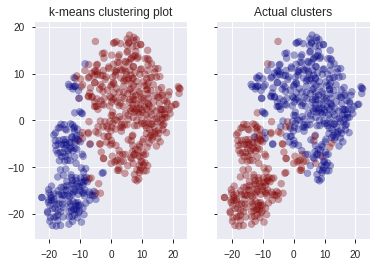

In [121]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", alpha=0.35)
ax2.set_title('Actual clusters')

/home/l.poberezhnya/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


Text(0.5,1,'Actual clusters')

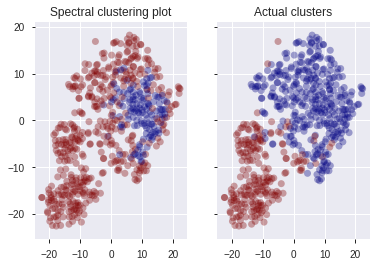

In [123]:
#Cluster using Spectral clustering and visualize using Isomap
from sklearn.cluster import SpectralClustering


# Play with gamma to optimize the clustering results
kmns = SpectralClustering(n_clusters=2,  gamma=0.5, affinity='rbf', assign_labels='kmeans')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('Spectral clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

Text(0.5,1,'Actual clusters')

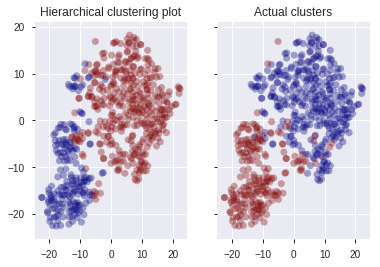

In [124]:
# Cluster using hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
aggC = AgglomerativeClustering(n_clusters=2, linkage='ward')
kY = aggC.fit_predict(X)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('Hierarchical clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

In [161]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.2, min_samples =4)
dbscanY = dbscan.fit_predict(X)

Text(0.5,1,'Actual clusters')

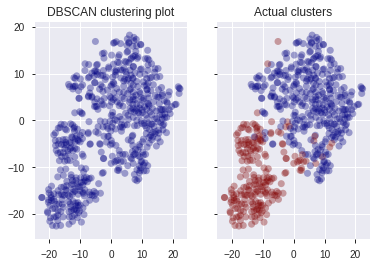

In [162]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(Y[:,0],Y[:,1],  c=dbscanY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('DBSCAN clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')